In [28]:
import cv2 as cv
import matplotlib.pyplot as plt
import torch

from cvnets.yolo.v2 import utils
from cvnets.yolo.v2.dataset import VOCDataset
from cvnets.yolo.v2.net import YOLOv2

In [4]:
model = YOLOv2(B=5, C=20)

x = torch.randn(1, 3, 416, 416)
out = model(x)
out.shape


torch.Size([1, 125, 13, 13])

In [ ]:
# make_dot(out, params=dict(list(model.named_parameters()))).render("yolov2", format="png")

In [7]:
# torchinfo.summary(model, input_size=(1, 3, 416, 416))

In [32]:
# Width and height of anchor boxes - normalized to 0 - 1.
anchor_bboxes = utils.load_anchor_bboxes("./checkpoints/anchor_bboxes_k_5.npy")
anchor_bboxes

tensor([[0.0909, 0.1513],
        [0.2128, 0.3505],
        [0.3453, 0.6833],
        [0.7909, 0.8212],
        [0.6200, 0.4043]])

In [11]:
dataset = VOCDataset("~/Documents/Datasets/VOC/", anchor_bboxes=anchor_bboxes, imgsz=320, split="val", normalize=False)

(224, 224, 3)


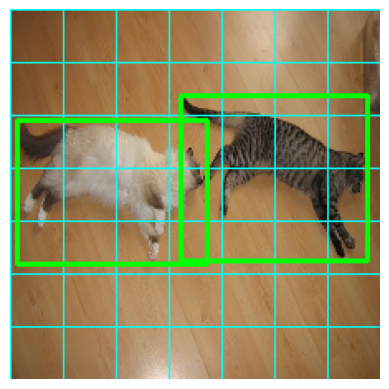

In [72]:
dataset.eval()
dataset.imgsz = 224

imgsz = dataset.imgsz
S = dataset.S
B = dataset.B

sample = dataset[4]

image = sample.image.permute(1, 2, 0).numpy().astype("uint8")
bboxes = sample.bboxes
labels = sample.labels
target = sample.target

cell_size = imgsz // S
for i in range(S):
    for j in range(S):
        cv.rectangle(
            image, (j * cell_size, i * cell_size), ((j + 1) * cell_size, (i + 1) * cell_size), (0, 255, 255), 1
        )

for bbox in bboxes:
    cv.rectangle(image, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)

print(image.shape)
plt.imshow(image)
plt.axis("off")
plt.show()

In [83]:
bboxes

tensor([[103.4880,  52.5653, 216.3840, 152.9173],
        [  4.9280,  67.4987, 119.1680, 154.7093]])

In [84]:
target.shape

torch.Size([7, 7, 5, 25])

In [87]:
target[3, 4]

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [89]:
decoded = utils.decode_target(target, anchor_bboxes, S, imgsz)
decoded[3, 4]

tensor([[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  